In [137]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
import os
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [138]:
#  Import and read the charity_data.csv.
charity_df = pd.read_csv("gdrive/My Drive/Colab Notebooks/Deep_Learning_Week/data/charity_data.csv")
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [139]:
charity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [140]:
charity_df.ASK_AMT.value_counts()

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [141]:
charity_df.drop(['EIN','NAME'], axis=1, inplace=True)
charity_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [142]:
# Determine the number of unique values in each column.
charity_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

# Optimization Attempt #1: Bin the ASK_AMT column

In [143]:
amt_ask = charity_df.ASK_AMT.value_counts()
amt_ask

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

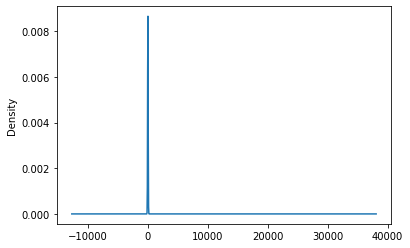

In [144]:
amt_ask.plot.density()


In [145]:
# Bin the ASK_AMT column
charity_df['ASK_BIN'] = pd.cut(charity_df['ASK_AMT'], [0, 1000, 2000, 3000, 4000, 5000, 10000, 10000000], 
                               labels=['0-1000','1000-2000','2000-3000','3000-4000','4000-5000','5000-10000','10000-10000000'])
charity_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,ASK_BIN
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1,4000-5000
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,10000-10000000
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,4000-5000
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,5000-10000
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,10000-10000000


In [146]:
charity_df.ASK_BIN.value_counts()

4000-5000         25398
10000-10000000     7940
5000-10000          549
0-1000                0
1000-2000             0
2000-3000             0
3000-4000             0
Name: ASK_BIN, dtype: int64

In [147]:
charity_df.dropna(inplace=True)

In [148]:
charity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33887 entries, 0 to 34297
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   APPLICATION_TYPE        33887 non-null  object  
 1   AFFILIATION             33887 non-null  object  
 2   CLASSIFICATION          33887 non-null  object  
 3   USE_CASE                33887 non-null  object  
 4   ORGANIZATION            33887 non-null  object  
 5   STATUS                  33887 non-null  int64   
 6   INCOME_AMT              33887 non-null  object  
 7   SPECIAL_CONSIDERATIONS  33887 non-null  object  
 8   ASK_AMT                 33887 non-null  int64   
 9   IS_SUCCESSFUL           33887 non-null  int64   
 10  ASK_BIN                 33887 non-null  category
dtypes: category(1), int64(3), object(7)
memory usage: 2.9+ MB


In [149]:
charity_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              70
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8335
IS_SUCCESSFUL                2
ASK_BIN                      3
dtype: int64

In [150]:
charity_df = charity_df.drop(['ASK_AMT'], axis=1)
charity_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL,ASK_BIN
0,T10,Independent,C1000,ProductDev,Association,1,0,N,1,4000-5000
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1,10000-10000000
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0,4000-5000
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1,5000-10000
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1,10000-10000000


In [151]:
# Look at APPLICATION_TYPE value counts for binning
app_count = charity_df.APPLICATION_TYPE.value_counts()
app_count

T3     26684
T4      1541
T6      1215
T5      1163
T19     1065
T8       737
T7       723
T10      528
T9       116
T13       66
T12       25
T2        15
T25        3
T29        2
T15        2
T14        1
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [152]:
# Determine which values to replace if counts are less than ...?
app_bin = list(app_count[app_count < 200].index)

# Replace in dataframe
for app in app_bin:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
charity_df.APPLICATION_TYPE.value_counts()

T3       26684
T4        1541
T6        1215
T5        1163
T19       1065
T8         737
T7         723
T10        528
Other      231
Name: APPLICATION_TYPE, dtype: int64

In [153]:
# Look at CLASSIFICATION value counts for binning
class_count = charity_df.CLASSIFICATION.value_counts()
class_count

C1000    17034
C2000     6023
C1200     4802
C3000     1908
C2100     1878
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 70, dtype: int64

In [154]:
# Determine which values to replace if counts are less than ..?
class_bin = list(class_count[class_count < 800].index)

# Replace in dataframe
for cls in class_bin:
    charity_df.CLASSIFICATION = charity_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
charity_df.CLASSIFICATION.value_counts()

C1000    17034
C2000     6023
C1200     4802
Other     2242
C3000     1908
C2100     1878
Name: CLASSIFICATION, dtype: int64

In [155]:
# Generate our categorical ('object' dtypes) variable lists
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()
charity_ask = charity_df.dtypes[charity_df.dtypes == "category"].index.tolist()

In [156]:
charity_ask

['ASK_BIN']

In [157]:
charity_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [158]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity_df[charity_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(charity_cat)

encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [159]:
encode_ask_df = pd.DataFrame(enc.fit_transform(charity_df[charity_ask]))
encode_ask_df.columns = enc.get_feature_names_out(charity_ask)
encode_ask_df.head()

,ASK_BIN_10000-10000000,ASK_BIN_4000-5000,ASK_BIN_5000-10000
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [160]:
# Merge one-hot encoded df's first
encode_df = encode_df.merge(encode_ask_df, left_index=True, right_index=True)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_BIN_10000-10000000,ASK_BIN_4000-5000,ASK_BIN_5000-10000
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [161]:
# Merge one-hot encoded features and drop the originals
charity_df = charity_df.merge(encode_df, left_index=True, right_index=True)
charity_df = charity_df.drop(charity_cat, 1)
charity_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,IS_SUCCESSFUL,ASK_BIN,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_BIN_10000-10000000,ASK_BIN_4000-5000,ASK_BIN_5000-10000
0,1,1,4000-5000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,1,10000-10000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,0,4000-5000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,1,5000-10000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1,1,10000-10000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [162]:
charity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33488 entries, 0 to 33886
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   STATUS                        33488 non-null  int64   
 1   IS_SUCCESSFUL                 33488 non-null  int64   
 2   ASK_BIN                       33488 non-null  category
 3   APPLICATION_TYPE_Other        33488 non-null  float64 
 4   APPLICATION_TYPE_T10          33488 non-null  float64 
 5   APPLICATION_TYPE_T19          33488 non-null  float64 
 6   APPLICATION_TYPE_T3           33488 non-null  float64 
 7   APPLICATION_TYPE_T4           33488 non-null  float64 
 8   APPLICATION_TYPE_T5           33488 non-null  float64 
 9   APPLICATION_TYPE_T6           33488 non-null  float64 
 10  APPLICATION_TYPE_T7           33488 non-null  float64 
 11  APPLICATION_TYPE_T8           33488 non-null  float64 
 12  AFFILIATION_CompanySponsored  33488 non-null  

In [170]:
charity_df = charity_df.drop(['ASK_BIN'], axis=1)

In [171]:
# Split our preprocessed data into our features and target arrays
y = charity_df['IS_SUCCESSFUL'].values
X = charity_df.drop(['IS_SUCCESSFUL'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=78)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [172]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, train, evaluate optimized model # 1

In [173]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train[0]) # must equal number of variables in feature df
hidden_nodes_1 = 8
hidden_nodes_2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_1, input_dim=input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 368       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 419
Trainable params: 419
Non-trainable params: 0
_________________________________________________________________


In [174]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [175]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [176]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
785/785 [==============================] - 2s 2ms/step - loss: 0.6974 - accuracy: 0.5242
Epoch 2/100
785/785 [==============================] - 1s 2ms/step - loss: 0.6907 - accuracy: 0.5391
Epoch 3/100
785/785 [==============================] - 1s 2ms/step - loss: 0.6896 - accuracy: 0.5400
Epoch 4/100
785/785 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5413
Epoch 5/100
785/785 [==============================] - 1s 2ms/step - loss: 0.6889 - accuracy: 0.5413
Epoch 6/100
 62/785 [=>............................] - ETA: 1s - loss: 0.6888 - accuracy: 0.5398
Epoch 6: saving model to checkpoints/weights.06.hdf5
785/785 [==============================] - 1s 2ms/step - loss: 0.6888 - accuracy: 0.5428
Epoch 7/100
785/785 [==============================] - 1s 2ms/step - loss: 0.6886 - accuracy: 0.5417
Epoch 8/100
785/785 [==============================] - 1s 2ms/step - loss: 0.6885 - accuracy: 0.5436
Epoch 9/100
785/785 [==============================] -

KeyboardInterrupt: ignored

In [177]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy*100:.3f} %")

262/262 - 0s - loss: 0.6908 - accuracy: 0.5319 - 436ms/epoch - 2ms/step
Loss: 0.6908006072044373, Accuracy: 53.189 %


# Optimization Attempt #1 = FAILURE

# -------------------------------
# Optimization Attempt # 2: Bin the NAME column

In [194]:
#  Import and read the charity_data.csv.
charity_df = pd.read_csv("gdrive/My Drive/Colab Notebooks/Deep_Learning_Week/data/charity_data.csv")
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [195]:
charity_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [196]:
charity_df.drop(['EIN'], axis=1, inplace=True)
charity_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [197]:
names = charity_df.NAME.value_counts()
names

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [198]:
len(list(names[names <= 1].index))

18776

In [199]:
# Determine which names to replace if counts are 1 or less
name_bin = list(names[names <= 1].index)

# Replace in dataframe
for name in name_bin:
    charity_df.NAME = charity_df.NAME.replace(name,"Other")
    
# Check to make sure binning was successful
charity_df.NAME.value_counts()

Other                                                                 18776
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
                                                                      ...  
WASHINGTON EXPLORER SEARCH AND RESCUE                                     2
INTERNATIONAL ALLIANCE THEATRICAL STAGE EMPLOYEES & MOVING PICTURE        2
BIRTH NETWORK                                                             2
NATIONAL ASSOCIATON OF CORPORATE DIRECTORS                                2
NATIONAL SOCIETY COLONIAL DAMES XVII CENTURY                              2
Name: NAME, Length: 793, dtype: int64

In [200]:
# Look at APPLICATION_TYPE value counts for binning
app_count = charity_df.APPLICATION_TYPE.value_counts()
app_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [201]:
len(list(app_count[app_count <= 100].index))

8

In [202]:
# Determine which values to replace if counts are less than ...?
app_bin = list(app_count[app_count < 100].index)

# Replace in dataframe
for app in app_bin:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
charity_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [203]:
# Look at CLASSIFICATION value counts for binning
class_count = charity_df.CLASSIFICATION.value_counts()
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [204]:
len(list(class_count[class_count <= 1000].index))

66

In [205]:
# Determine which values to replace if counts are less than ..?
class_bin = list(class_count[class_count < 1000].index)

# Replace in dataframe
for cls in class_bin:
    charity_df.CLASSIFICATION = charity_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
charity_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [206]:
# Generate our categorical ('object' dtypes) variable lists
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()
charity_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [207]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity_df[charity_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(charity_cat)
encode_df.head()

,NAME_4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,NAME_AACE INTERNATIONAL,NAME_ACADEMY OF GENERAL DENTISTRY,NAME_ACADEMY OF MANAGED CARE PHARMACY,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTIVE 20-30 UNITED STATES AND CANADA,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AGENTS ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [208]:
# Merge one-hot encoded features and drop the originals
charity_df = charity_df.merge(encode_df, left_index=True, right_index=True)
charity_df = charity_df.drop(charity_cat, 1)
charity_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,NAME_AACE INTERNATIONAL,NAME_ACADEMY OF GENERAL DENTISTRY,NAME_ACADEMY OF MANAGED CARE PHARMACY,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTIVE 20-30 UNITED STATES AND CANADA,NAME_ACTS MINISTRY,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [209]:
# Split our preprocessed data into our features and target arrays
y = charity_df['IS_SUCCESSFUL'].values
X = charity_df.drop(['IS_SUCCESSFUL'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=78)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [210]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, train, and evaluate optimized model # 2

In [211]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train[0]) # must equal number of variables in feature df
hidden_nodes_1 = 6
hidden_nodes_2 = 4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_1, input_dim=input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 5028      
                                                                 
 dense_4 (Dense)             (None, 4)                 28        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5,061
Trainable params: 5,061
Non-trainable params: 0
_________________________________________________________________


In [212]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [213]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=3800)

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [214]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 3s 2ms/step - loss: 0.6297 - accuracy: 0.7402
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5188 - accuracy: 0.7848
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4843 - accuracy: 0.7900
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4706 - accuracy: 0.7921
Epoch 5/50
561/804 [===================>..........] - ETA: 0s - loss: 0.4641 - accuracy: 0.7934
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.4636 - accuracy: 0.7936
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4599 - accuracy: 0.7938
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4583 - accuracy: 0.7932
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4560 - accuracy: 0.7951
Epoch 9/50
804/804 [==============================] - 2s 2ms/s

In [215]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy*100:.3f} %")

268/268 - 0s - loss: 0.4549 - accuracy: 0.8000 - 438ms/epoch - 2ms/step
Loss: 0.4549458622932434, Accuracy: 80.000 %


# Optimization attempt # 2: SUCCESS!! 

## 80.00%

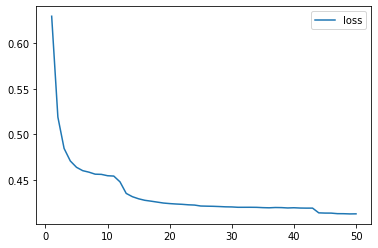

In [216]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

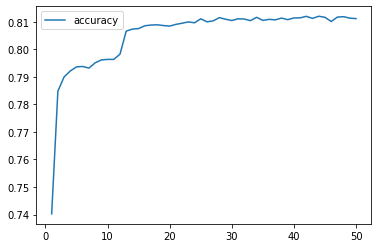

In [217]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [218]:
from google.colab import files
# Export our model to HDF5 file
path = "gdrive/My Drive/Colab Notebooks/Deep_Learning_Week/data"
nn.save("AlphabetSoupCharityOpt.h5", path)
files.download("AlphabetSoupCharityOpt.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>